In [ ]:
%load_ext cudf.pandas

# Installing Libs

In [12]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [13]:
!pip install optuna
!pip install pycaret[analysis,models,tuner]

# Importing Libs

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from pycaret.classification import *

# Constants

In [3]:
DATA_PATH = "dataset\\data.csv"

TARGET_COL = "Stage"

# AutoML (PyCaret)

In [17]:
s = setup(data_df, target = TARGET_COL, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

ValueError: Length of values (5) does not match length of index (4)

In [ ]:
predictor = TabularPredictor(label=TARGET_COL).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20240601_180909"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240601_180909/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.


RayTaskError(AttributeError): [36mray::_sub_fit()[39m (pid=9643, ip=172.28.0.12)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/tabular/predictor/predictor.py", line 4971, in _sub_fit
    train_data, val_data = generate_train_test_split_combined(
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/utils.py", line 393, in generate_train_test_split_combined
    X, y = extract_label(data=data, label=label)
  File "/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/utils.py", line 354, in extract_label
    if label not in list(data.columns):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 5989, in __getattr__
    return object.__getattribute__(self, name)
  File "pandas/_libs/properties.pyx", line 65, in pandas._libs.properties.AxisProperty.__get__
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 5989, in __getattr__
    return object.__getattribute__(self, name)
AttributeError: 'TabularDataset' object has no attribute '_mgr'

In [ ]:
predictor

# Dataset

## Loading Data

In [4]:
data_df = pd.read_csv(DATA_PATH)
data_df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [6]:
object_cols=[col for col in data_df.columns if data_df[col].dtype=="object"]
object_cols
number_of_unique={col:len(data_df[col].unique()) for col in object_cols}
number_of_unique,

({'Status': 3,
  'Drug': 2,
  'Sex': 2,
  'Ascites': 2,
  'Hepatomegaly': 2,
  'Spiders': 2,
  'Edema': 3},)

In [7]:
ohe = OneHotEncoder()
ord = OrdinalEncoder()

cols_for_ordinal = ["Status", "Sex"]
cols_for_ohe = ["Drug", "Ascites", "Hepatomegaly", "Spiders", "Edema"]

ord_result  = ord.fit_transform(data_df[cols_for_ordinal])
ohe_result = ohe.fit_transform(data_df[cols_for_ohe])

columns_ohe = ohe.get_feature_names_out(cols_for_ohe)

ord_df = pd.DataFrame(ord_result, columns=cols_for_ordinal)
ohe_df = pd.DataFrame(ohe_result.toarray(), columns=columns_ohe)

# merge with the existing dataframe and remove the old columns
data_df = pd.concat([data_df, ohe_df], axis=1).drop(columns=cols_for_ohe)
data_df[cols_for_ordinal] = ord_df

In [8]:
data_df.head()

,N_Days,Status,Age,Sex,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,...,Drug_Placebo,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2221,0.0,18499,0.0,0.5,149.0,4.04,227.0,598.0,52.70,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1230,0.0,19724,1.0,0.5,219.0,3.93,22.0,663.0,45.00,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4184,0.0,11839,0.0,0.5,320.0,3.54,51.0,1243.0,122.45,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2090,2.0,16467,0.0,0.7,255.0,3.74,23.0,1024.0,77.50,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2105,2.0,21699,0.0,1.9,486.0,3.54,74.0,1052.0,108.50,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [9]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N_Days                25000 non-null  int64  
 1   Status                25000 non-null  float64
 2   Age                   25000 non-null  int64  
 3   Sex                   25000 non-null  float64
 4   Bilirubin             25000 non-null  float64
 5   Cholesterol           25000 non-null  float64
 6   Albumin               25000 non-null  float64
 7   Copper                25000 non-null  float64
 8   Alk_Phos              25000 non-null  float64
 9   SGOT                  25000 non-null  float64
 10  Tryglicerides         25000 non-null  float64
 11  Platelets             25000 non-null  float64
 12  Prothrombin           25000 non-null  float64
 13  Stage                 25000 non-null  int64  
 14  Drug_D-penicillamine  25000 non-null  float64
 15  Drug_Placebo       

In [ ]:
x, y = train_df.drop(TARGET_COL, axis=1).values, train_df[TARGET_COL].values

In [ ]:
type(train_x), type(train_y), type(test_x), type(test_y)

(cudf.pandas._wrappers.numpy.ndarray,
 cudf.pandas._wrappers.numpy.ndarray,
 cudf.pandas._wrappers.numpy.ndarray,
 cudf.pandas._wrappers.numpy.ndarray)

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((3250000, 21), (3250000,), (1000, 21), (1000,))

# AutoML (PyCaret)

In [10]:
clf = setup(data_df, target=TARGET_COL, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

,Description,Value
0,Session id,2572
1,Target,Stage
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(25000, 25)"
5,Transformed data shape,"(25000, 25)"
6,Transformed train set shape,"(17500, 25)"
7,Transformed test set shape,"(7500, 25)"
8,Numeric features,24
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060 Ti, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that 

In [11]:
best_clf = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9609,0.9946,0.9609,0.9609,0.9609,0.9413,0.9413,0.6150
lightgbm,Light Gradient Boosting Machine,0.9582,0.9939,0.9582,0.9584,0.9582,0.9373,0.9374,1.7100
catboost,CatBoost Classifier,0.9579,0.9939,0.9579,0.9579,0.9579,0.9368,0.9369,4.0810
rf,Random Forest Classifier,0.9505,0.9928,0.9505,0.9505,0.9504,0.9257,0.9257,0.2220
et,Extra Trees Classifier,0.9413,0.9901,0.9413,0.9414,0.9413,0.9119,0.9120,0.1710
dt,Decision Tree Classifier,0.9122,0.9362,0.9122,0.9123,0.9122,0.8683,0.8684,0.0730
gbc,Gradient Boosting Classifier,0.8510,0.0000,0.8510,0.8530,0.8514,0.7765,0.7771,3.7660
knn,K Neighbors Classifier,0.8150,0.9280,0.8150,0.8162,0.8152,0.7224,0.7228,0.1320
ada,Ada Boost Classifier,0.6843,0.0000,0.6843,0.6847,0.6842,0.5264,0.5266,0.4040
lda,Linear Discriminant Analysis,0.5918,0.0000,0.5918,0.5903,0.5908,0.3878,0.3880,0.0400


In [13]:
print(best_clf)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)


In [14]:
evaluate_model(best_clf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>

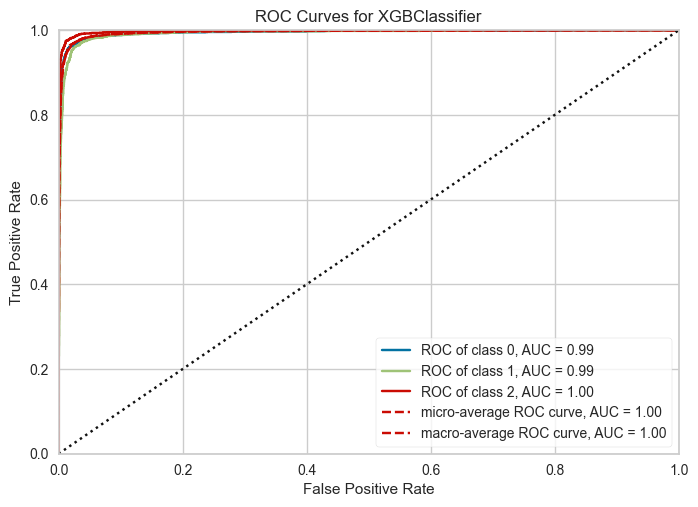

In [15]:
plot_model(best_clf, plot = 'auc')

In [16]:
predict_model(best_clf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9637,0.9951,0.9637,0.9637,0.9637,0.9456,0.9456


,N_Days,Status,Age,Sex,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,...,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage,prediction_label,prediction_score
3441,533,1.0,19470,1.0,1.2,275.000000,3.43,100.000000,1142.000000,75.000000,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3,3,0.9949
13332,3149,0.0,13073,0.0,0.6,216.000000,3.55,28.000000,601.000000,60.450001,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3,3,0.6344
82,1525,0.0,14212,0.0,0.5,226.000000,2.93,22.000000,674.000000,58.000000,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2,2,0.8929
2990,3428,2.0,20442,0.0,3.3,299.000000,3.55,131.000000,1029.000000,119.349998,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2,2,0.9680
17049,850,2.0,14610,0.0,2.8,242.000000,3.80,74.000000,614.000000,136.399994,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3,3,0.9084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20894,778,2.0,23376,0.0,1.8,369.510559,3.15,97.648384,1982.655762,122.556343,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3,3,0.9855
14231,974,2.0,13736,0.0,11.0,296.000000,3.55,358.000000,9933.200195,167.399994,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2,2,0.9865
16115,999,2.0,16463,0.0,2.3,316.000000,3.35,172.000000,1601.000000,179.800003,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0.7286
17106,2847,2.0,17758,0.0,1.2,314.000000,3.20,204.000000,12258.799805,72.239998,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2,2,0.9874


In [17]:
tuned_clf = tune_model(best_clf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9486,0.9914,0.9486,0.9486,0.9486,0.9229,0.9229
1,0.9623,0.9926,0.9623,0.9624,0.9623,0.9434,0.9435
2,0.9411,0.9914,0.9411,0.9412,0.9412,0.9117,0.9117
3,0.9451,0.9910,0.9451,0.9453,0.9452,0.9177,0.9178
4,0.9520,0.9939,0.9520,0.9521,0.9520,0.9280,0.9280
5,0.9600,0.9941,0.9600,0.9600,0.9600,0.9400,0.9400
6,0.9469,0.9912,0.9469,0.9469,0.9467,0.9203,0.9204
7,0.9600,0.9961,0.9600,0.9600,0.9600,0.9400,0.9400
8,0.9486,0.9939,0.9486,0.9487,0.9486,0.9229,0.9229


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
print(best_clf)

print(tuned_clf)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)
XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_cate

# Proposed Model